In [40]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import interpolate
from matplotlib.ticker import AutoMinorLocator

In [41]:
str_index = ["Меандр, В", "C1, В", "C2, В", "C3, В"]

A_proc_50 = np.array([0.8043, 0.2776, 0.1709, 0.121, 0.09253, 0.07117])
A_proc_75 = np.array([0.4786, 0.3114, 0.2117, 0.09253, 0.000, 0.05694])
A_proc_25 = np.array([0.5053, 0.3060, 0.2117, 0.09786, 0.000, 0.04982])

odd_numbers = np.array([2*i + 1 for i in range(0, 6)])
even_numbers = np.array([2*i for i in range(1, 7)])
numbers = np.array([i for i in range (1, 7)])

$C_{fur-th} = \frac{sin(\tau \pi n/T)}{n}$, где
* $n$ - номер гармоники
* $\frac{T}{\tau}$ - скважность

$C_{fur-pr} = \frac{A}{A_0}$

## Расчет коэф. C 

### Скважность = 2 (50%)

In [42]:
A0 = np.mean([996.4, 989.3, 996.4, 989.3])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.5*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_50 / A0
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,1.000000,0.333333,0.200000,0.142857,0.111111,0.090909
C_pr,0.810092,0.279599,0.172131,0.121871,0.093196,0.071683


### Скважность = 4/3 (75%)

In [43]:
A0 = np.mean([498.2, 498.2, 498.2, 498.2])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.75*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_75 / A0
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.707107,0.235702,0.141421,0.101015,0.078567,0.064282
C_pr,0.960658,0.625050,0.424930,0.185729,0.000000,0.114291


### Скважность = 4 (25%)

In [44]:
A0 = np.mean([491.1, 498.2, 491.1, 494.7])*10**(-3) # среднее по квадрату

c_fur_th = np.abs(np.sin(0.25*np.pi*odd_numbers)/odd_numbers)
c_fur_pr = A_proc_25 / A0
df = pd.DataFrame([c_fur_th, c_fur_pr], index=["C_th", "C_pr"], columns=numbers)
df

,1,2,3,4,5,6
C_th,0.707107,0.235702,0.141421,0.101015,0.078567,0.064282
C_pr,1.023341,0.619715,0.428738,0.198187,0.000000,0.100896


## Расчет коэф. $\alpha$

$\alpha_{th}=\frac{1}{\sqrt{1+(\nu C R)^2}}$

$\alpha_{pr}=\frac{A}{A_0}$

In [45]:
nu = np.array([8.009, 23.98, 40.05, 56.01, 71.98, 88.03]) * 10**(3)
omega = 2*np.pi*nu

R = 10000
C1 = 100 * 10**(-12)
C2 = 200 * 10**(-12)
C3 = 530 * 10**(-12)

c1 = np.array([0.793, 0.263, 0.145, 0.096, 0.071, 0.046])
c2 = np.array([0.790, 0.249, 0.128, 0.082, 0.057, 0.039])
c3 = np.array([0.750, 0.192, 0.085, 0.056, 0.028, 0.021])

In [46]:
A0 = np.mean([975.1, 989.3, 982.2, 966])*10**(-3) # среднее по квадрату

alpha_th = 1/((1+(omega*C1*R)**2)**0.5)
alpha_pr = c1 / A0

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df


,1,2,3,4,5,6
alpha_th,0.998736,0.988839,0.969767,0.943292,0.911148,0.875065
alpha_pr,0.810714,0.268875,0.148239,0.098144,0.072586,0.047028


In [47]:
A0 = np.mean([960, 989.3, 982.2, 968])*10**(-3) # среднее по квадрату

alpha_th = 1/((1+(omega*C2*R)**2)**0.5)
alpha_pr = c2 / A0

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,0.994974,0.957472,0.893251,0.817753,0.741622,0.670595
alpha_pr,0.810360,0.255417,0.131299,0.084113,0.058469,0.040005


In [48]:
A0 = np.mean([975.1, 989.3, 989.3, 960])*10**(-3) # среднее по квадрату

alpha_th = 1/((1+(omega*C3*R)**2)**0.5)
alpha_pr = c3 / A0

df = pd.DataFrame([alpha_th, alpha_pr], index=["alpha_th", "alpha_pr"], columns=numbers)
df

,1,2,3,4,5,6
alpha_th,0.966225,0.781419,0.599894,0.472513,0.385026,0.322857
alpha_pr,0.766538,0.196234,0.086874,0.057235,0.028617,0.021463


In [49]:
nu = np.array([8, 24, 40, 56, 72, 88])
str_nu = [str(i)+" кГц" for i in nu]

### Первые 6 гармоник для меандра, прошедшего через различные фильтры

In [50]:
df = pd.DataFrame([A_proc_50, c1, c2, c3], index=str_index, columns=str_nu)
df

,8 кГц,24 кГц,40 кГц,56 кГц,72 кГц,88 кГц
"Меандр, В",0.8043,0.2776,0.1709,0.121,0.09253,0.07117
"C1, В",0.7930,0.2630,0.1450,0.096,0.07100,0.04600
"C2, В",0.7900,0.2490,0.1280,0.082,0.05700,0.03900
"C3, В",0.7500,0.1920,0.0850,0.056,0.02800,0.02100


### Коэффициенты пропускания для разных фильтров

In [51]:
a  = np.array([c1, c2, c3])/A_proc_50
df = pd.DataFrame(np.round(a,2), index=str_index[1:], columns = str_nu)
df

,8 кГц,24 кГц,40 кГц,56 кГц,72 кГц,88 кГц
"C1, В",0.99,0.95,0.85,0.79,0.77,0.65
"C2, В",0.98,0.90,0.75,0.68,0.62,0.55
"C3, В",0.93,0.69,0.50,0.46,0.30,0.30


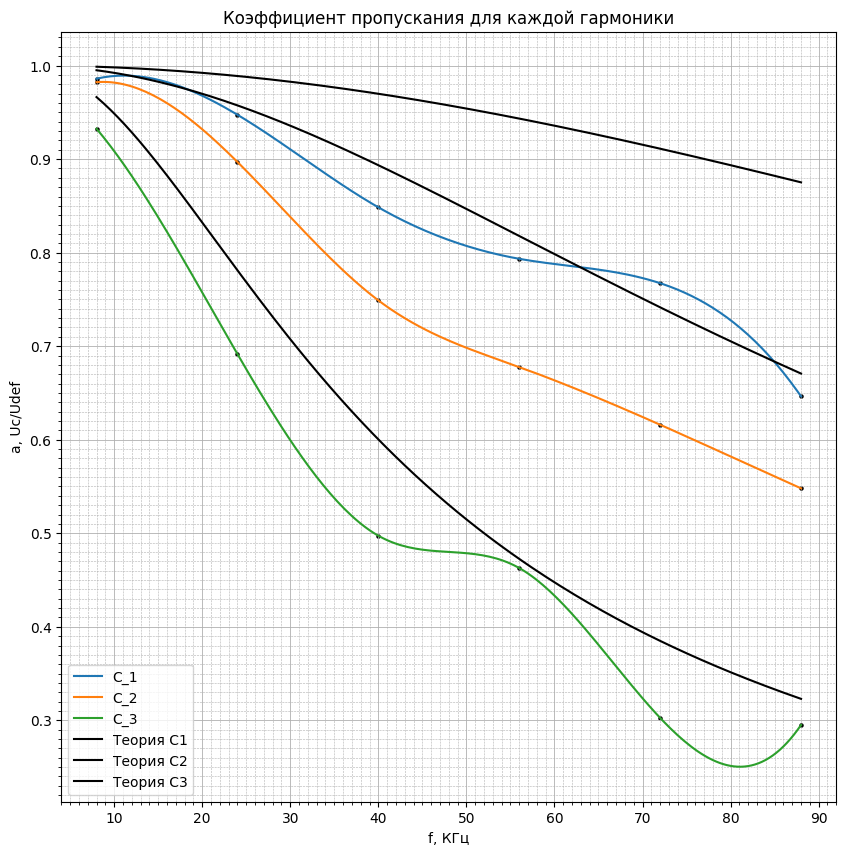

In [52]:
fig, axs = plt.subplots(1,1, figsize = (10,10))
x = np.linspace(8, 88, 200)
f_sr = 1 / (2 * np.pi * np.array([C1, C2, C3]) * R) * 10 **(-3)
axs.set_title("Коэффициент пропускания для каждой гармоники")
axs.set_xlabel("f, КГц")
axs.set_ylabel("a, Uc/Udef")
lb = [f"C_{i + 1}" for i in range(3)]

for i in range(3):
    cubic = interpolate.interp1d(nu, a[i], kind="cubic")
    y = cubic(x)
    axs.scatter(nu, a[i], s = 5, color = "black")
    axs.plot(x, y, label = lb[i])

# axs.plot(x, np.linspace(1/(2**0.5), 1/(2**0.5), 200), color = "black")
# for i in range (3):
#     axs.plot(np.linspace(f_sr[i]/(2 * np.pi), f_sr[i]/(2 * np.pi), 200), np.linspace(0.6, 0.8, 200), color = "black")
axs.plot(x, (1 / np.sqrt(1 + (2 * np.pi * x * C1 * R * 10**3)**2)), color = "black", label = "Теория C1")
axs.plot(x, (1 / np.sqrt(1 + (2 * np.pi * x * C2 * R * 10**3)**2)), color = "black", label = "Теория C2")
axs.plot(x, (1 / np.sqrt(1 + (2 * np.pi * x * C3 * R * 10**3)**2)), color = "black", label = "Теория C3")

axs.legend()
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)